In [28]:
from crosspy.preprocessing.signal import filter_data
import numpy as np
from numpy import log10
import matplotlib.pyplot as plt
from scipy.io import savemat
import os 
import pandas as pd



from crosspy.postprocessing.visualization.vis_3d import BrainSurface
from crosspy.postprocessing.visualization.utils import draw_four_views
fsaverage_path = r'/usr/local/freesurfer/subjects/fsaverage' # path to a parcellation, required for labels, anatomy and so on
# create to hemis separately, choose parcellation that match your data and any surface that you want, e.g. pial/inflated
brain_surf_lh = BrainSurface(fsaverage_path, parcellation='Schaefer2018_200Parcels_17Networks_order', 
                             hemis=['lh'], surface='inflated')
brain_surf_rh = BrainSurface(fsaverage_path, parcellation='Schaefer2018_200Parcels_17Networks_order', 
                             hemis=['rh'], surface='inflated')
brain_3d_surfaces = [brain_surf_lh, brain_surf_rh]
# should be your data parcel names! 
surf_parcel_names = np.array(brain_surf_lh.parcel_names[1:] + brain_surf_rh.parcel_names[1:]) 
idx_sorted = np.argsort(surf_parcel_names) 
surf_parcel_names = surf_parcel_names[idx_sorted] 

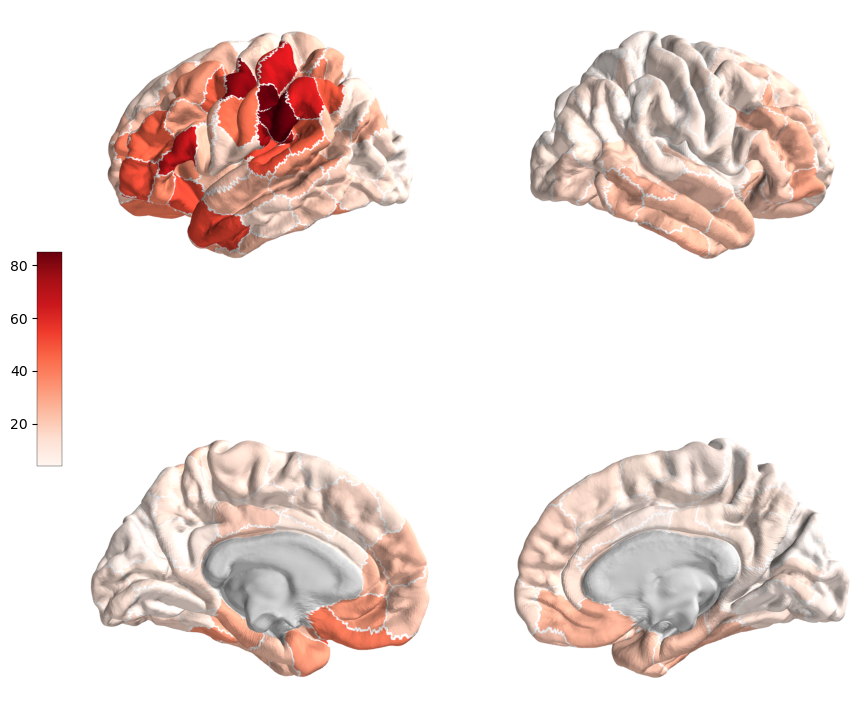

In [4]:
#filepath = '/mnt/megshare/Development/Sheng/__dump/0390_spikes/0390_spont4_02HzHighPass.csv'
filepath = '/mnt/megshare/Development/Sheng/__dump/0390_spikes/0390_spont4_05HzHighPass.csv'
#filepath = '/mnt/megshare/Development/Sheng/__dump/0390_spikes/0390_spont4_10HzHighPass.csv'
#filepath = '/mnt/megshare/Development/Sheng/__dump/0390_spikes/0390_spont4_15HzHighPass.csv'



df = pd.read_csv(filepath, header=None)
values = df.to_numpy()

CMAP='Reds'
Z_LIM=np.percentile(values, (1,99))

# axes should be a 2x2 numpy array
fig, axes = plt.subplots(figsize=(10,10), ncols=2, nrows=2)

# the actual plotting function. 
draw_four_views(axes, values, surf_parcel_names, brain_3d_surfaces, cmap=CMAP, norm_values=Z_LIM)

In [3]:
print(idx_sorted)

[ 65  57  58  59  60  62  63  64  61  56  67  68  69  70  66  73  71  72
  74  75  79  80  81  76  77  78  86  87  88  89  90  91  92  93  94  82
  83  84  85  95  97  96  30  31  32  33  28  29  38  34  35  36  37  52
  53  54  55  50  51  44  45  41  42  40  43  39  46  48  47  49  12  13
  14  15  16  17  18  19  20  21  24  26  27  22  23  25  98  99   0   1
   3   4   5   2   6   7   8  10  11   9 169 164 165 166 167 168 172 173
 174 175 179 176 177 178 170 171 182 180 181 183 184 186 187 188 185 190
 191 192 189 193 195 194 131 132 133 134 135 130 140 136 137 138 139 160
 161 162 163 156 157 158 159 146 149 145 143 144 147 148 141 142 150 153
 154 152 151 155 112 121 122 113 114 115 116 117 118 119 120 123 124 129
 125 126 127 128 196 197 198 199 100 101 103 104 105 102 106 107 109 110
 111 108]


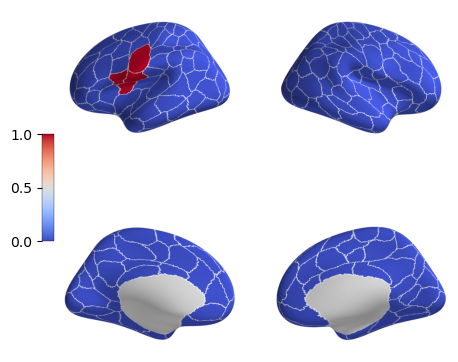

In [30]:
PARC_ID= [81, 84, 61, 62,]
values = np.zeros(200)
values[PARC_ID] = 1

#CMAP='Reds'
CMAP='coolwarm'
#Z_LIM=np.percentile(values, (50,70))
Z_LIM=[0, 1]

# axes should be a 2x2 numpy array
fig, axes = plt.subplots(figsize=(5,5), ncols=2, nrows=2)

# the actual plotting function. 
draw_four_views(axes, values, surf_parcel_names, brain_3d_surfaces, cmap=CMAP, norm_values=Z_LIM)



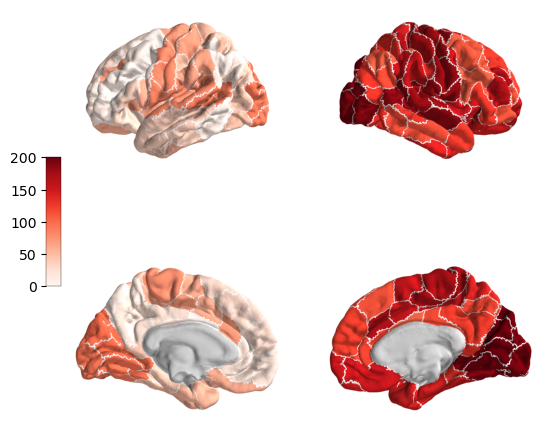

In [9]:
#61, 65
#78, 95
#PARC_ID = np.concatenate(np.arange(81, 83), np.arange(61, 65))
'''
PARC_ID= [81, 61, 62, ] 
#values = np.zeros(200)
values[PARC_ID] = 1
'''
values=np.arange(0, 200)


CMAP='Reds'
#Z_LIM=np.percentile(values, (1,99))
Z_LIM=[0, 200]

# axes should be a 2x2 numpy array
fig, axes = plt.subplots(figsize=(6,6), ncols=2, nrows=2)

# the actual plotting function. 
draw_four_views(axes, values, surf_parcel_names, brain_3d_surfaces, cmap=CMAP, norm_values=Z_LIM)

In [22]:


writeoutParc = '/mnt/megshare/Development/Sheng/__dump/0390_spikes/Yeo17_Schaefer200parc_Vlad.csv'
df = pd.DataFrame(surf_parcel_names, columns=["Parcels_Vlad"]) 
df.to_csv(writeoutParc, index=True)


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

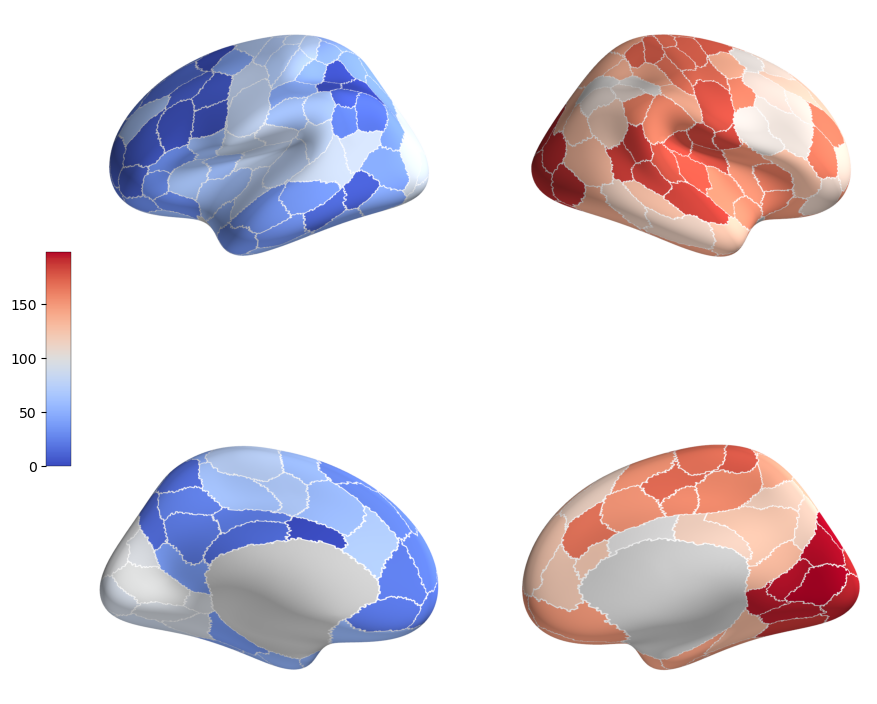

In [42]:
values = np.arange(0,200)

CMAP='coolwarm'
#Z_LIM=np.percentile(values, (1,99))
Z_LIM=[0, 199]

# axes should be a 2x2 numpy array
fig, axes = plt.subplots(figsize=(10,10), ncols=2, nrows=2)

# the actual plotting function. 
draw_four_views(axes, values, surf_parcel_names, brain_3d_surfaces, cmap=CMAP, norm_values=Z_LIM)